In [78]:
import pandas as pd

In [143]:
df = pd.read_csv("../raw_data/all_expanded_ML.csv")

In [149]:
df = df.drop(columns=[
"Código_UF",
"UF",
"Estado",
"Município",
"Região",
])

In [145]:
df.describe()

,Ano,Código_IBGE,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,Magreza_total_%,PIB,Poverty_%,Unemployed_%,Acesso_a_internet_%,Adjusted_population,Adjusted_funding
count,62172.000000,6.217200e+04,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,62172.000000,6.217200e+04,6.217200e+04
mean,2016.018658,3.166202e+06,84.262247,8.477551,7.260202,996.959339,76.345155,2.906115,31.044345,3.750925,26778.143641,27.971496,9.924198,55.707215,2.679314e+04,1.064420e+07
std,2.580877,1.018599e+06,10.435561,7.314059,6.689737,5998.539678,1058.160622,11.200469,149.817023,2.893270,11251.731789,14.644273,3.507049,16.267792,1.654634e+05,5.064723e+07
min,2012.000000,1.100015e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9009.127144,7.980000,2.875000,21.000000,2.026500e+02,0.000000e+00
25%,2014.000000,2.406809e+06,77.700000,2.900000,2.100000,154.000000,15.000000,1.000000,6.000000,2.380000,16919.841890,14.540000,7.250000,44.000000,3.717050e+03,1.601524e+06
50%,2016.000000,3.131802e+06,85.300000,7.000000,5.900000,316.000000,23.000000,1.000000,12.000000,3.570000,25021.801740,21.000000,9.350000,56.000000,8.104750e+03,3.710356e+06
75%,2018.000000,4.110003e+06,92.200000,12.300000,10.600000,696.000000,46.000000,2.000000,24.000000,4.810000,36219.335320,42.970000,12.350000,69.000000,1.848750e+04,9.339107e+06
max,2020.000000,5.300108e+06,100.000000,100.000000,100.000000,430352.000000,179976.000000,694.000000,12010.000000,100.000000,90742.750390,55.920000,20.175000,86.000000,1.047645e+07,3.970060e+09


# Performance Measure

Mean Absolute Error (MAE): The average absolute differences between the predicted and actual outcomes.

The distribution of the target variable Adjusted_funding is highly skewed, with a tail towards the right, indicating extreme values or outliers in the data. Hence, MQE is a better choise fir performance measrures, as 
- Measures like MSE and RMSE are highly sensitive to outliers and skewness. 

# Feature Engineering

In [97]:
# 2. Teacher-Student Ratio
df['Teacher_Student_Ratio'] = df['Docentes'] / df['Matrículas']

# 3. Educational Infrastructure Index
df['Educational_Infrastructure_Index'] = df['Estabelecimentos'] / df['Adjusted_population']

# 4. Number of students passing
df['Students_Passing'] = (df['Aprovação'] / 100) * df['Matrículas']

# 5. Number of students failing
df['Students_Failing'] = (df['Reprovação'] / 100) * df['Matrículas']

# 6. Number of students dropping out
df['Students_DroppingOut'] = (df['Abandono'] / 100) * df['Matrículas']

# 7. Number of students dropping out per batch
df['Students_Passing_Per_Batch'] = df['Students_Passing']/df['Turmas']

# 8. Number of students dropping out per batch
df['Students_Failing_Per_Batch'] = df['Students_Failing']/df['Turmas']

# 9. Number of students dropping out per batch
df['Students_DroppingOut_Per_Batch'] = df['Students_DroppingOut']/df['Turmas']

# # Sort the dataframe by 'Ano' (Year), 'Código_IBGE', and 'Localização' (Location)
# df.sort_values(by=['Código_IBGE', 'Localização', 'Ano'], inplace=True)
# # Calculate the Population and PIB Growth Rates

# #10. Population growth rate
# df['Population_Growth_Rate_Calc'] = df.groupby(['Código_IBGE', 'Localização'])['Adjusted_population'].pct_change() * 100

# #11 GDP per capita growth rate
# df['PIB_Growth_Rate'] = df.groupby(['Código_IBGE', 'Localização'])['PIB'].pct_change() * 100

In [98]:
df[df.isna().any(axis=1)]

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Adjusted_population,Adjusted_funding,Teacher_Student_Ratio,Educational_Infrastructure_Index,Students_Passing,Students_Failing,Students_DroppingOut,Students_Passing_Per_Batch,Students_Failing_Per_Batch,Students_DroppingOut_Per_Batch
1613,2012,3502804,Rural,0.0,100.0,0.0,0,0,0,0,...,27516.15,6330012.061,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [99]:
df = df.dropna()
df = df.drop_duplicates()

In [100]:
df[df.isna().any(axis=1)]

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Adjusted_population,Adjusted_funding,Teacher_Student_Ratio,Educational_Infrastructure_Index,Students_Passing,Students_Failing,Students_DroppingOut,Students_Passing_Per_Batch,Students_Failing_Per_Batch,Students_DroppingOut_Per_Batch


# Test Set

In [85]:
# Sort the dataset by the 'Ano' (Year) column to ensure it's in chronological order
df_sorted = df.sort_values(by='Ano')

# Determine the cut-off year for splitting the dataset into training and test sets
# Here, let's take the data of the last year available as the test set
cut_off_year = df_sorted['Ano'].max()

# Create the training and test sets based on the cut-off year
train_set = df_sorted[df_sorted['Ano'] < cut_off_year]
test_set = df_sorted[df_sorted['Ano'] == cut_off_year]

# Show the number of samples in the training and test sets
num_train_samples = len(train_set)
num_test_samples = len(test_set)

num_train_samples, num_test_samples

(55187, 6969)

In [71]:
#df = train_set.copy()

# Simple Preprocessing

In [41]:
df.dtypes

Ano                                   int64
Código_IBGE                           int64
Localização                          object
Aprovação                           float64
Reprovação                          float64
Abandono                            float64
Matrículas                            int64
Docentes                              int64
Estabelecimentos                      int64
Turmas                                int64
Magreza_total_%                     float64
PIB                                 float64
Poverty_%                           float64
Unemployed_%                        float64
Acesso_a_internet_%                   int64
Adjusted_population                 float64
Adjusted_funding                    float64
Teacher_Student_Ratio               float64
Educational_Infrastructure_Index    float64
Students_Passing                    float64
Students_Failing                    float64
Students_DroppingOut                float64
Students_Passing_Per_Batch      

In [86]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable for both training and test sets
X_train = train_set.drop("Adjusted_funding", axis=1)
y_train = train_set["Adjusted_funding"]
X_test = test_set.drop("Adjusted_funding", axis=1)
y_test = test_set["Adjusted_funding"]

# Define the numerical and categorical columns for preprocessing
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = ['Localização']

# Create a column transformer that applies standard scaling to numerical columns
# and one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

# # Create a pipeline that first applies the column transformer and then fits a model
# # Note: We are only setting up the pipeline here, not fitting any model yet
# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# # Apply the pipeline to the training and test sets
# X_train_preprocessed = pipeline.fit_transform(X_train)
# X_test_preprocessed = pipeline.transform(X_test)

# # Show the shape of the preprocessed data to confirm the operation
# X_train_preprocessed.shape, X_test_preprocessed.shape


In [87]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Ano', 'Código_IBGE', 'Aprovação',
                                  'Reprovação', 'Abandono', 'Matrículas',
                                  'Docentes', 'Estabelecimentos', 'Turmas',
                                  'Magreza_total_%', 'PIB', 'Poverty_%',
                                  'Unemployed_%', 'Acesso_a_internet_%',
                                  'Adjusted_population',
                                  'Teacher_Student_Ratio',
                                  'Educational_Infrastructure_Index',
                                  'Students_Passing', 'Students_Failing',
                                  'Students_DroppingOut',
                                  'Students_Passing_Per_Batch',
                                  'Students_Failing_Per_Batch',
                                  'Students_DroppingOut_Per_Batch']),
                                ('cat', OneHotEncoder(), ['Localização'])])

In [131]:
pd.DataFrame(df.Adjusted_funding).describe()

,Adjusted_funding
count,6.215600e+04
mean,1.064554e+07
std,5.065350e+07
min,0.000000e+00
25%,1.601628e+06
50%,3.710732e+06
75%,9.339626e+06
max,3.970060e+09


# Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Add Linear Regression to the pipeline
pipeline_with_lr = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LinearRegression())])

# Fit the model to the training data
pipeline_with_lr.fit(X_train, y_train)

import numpy as np

# Make predictions on the test set
y_pred = pipeline_with_lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

lr_metrics = [mae, mse, rmse, r2]

mae, mse, rmse, r2



(4561652.3036269015, 238792306782808.7, 15452906.095062142, 0.939394712315059)

# Linear Regression (No Outliers)

In [101]:
# Calculate the IQR (Interquartile Range) for 'Adjusted_funding'
Q1 = df['Adjusted_funding'].quantile(0.25)
Q3 = df['Adjusted_funding'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where 'Adjusted_funding' is an outlier
df_filtered_no_outliers = df[(df['Adjusted_funding'] >= lower_bound) & (df['Adjusted_funding'] <= upper_bound)]

In [127]:
df_filtered_no_outliers.shape, df.shape

((55910, 25), (62156, 25))

In [102]:
# Sort the dataset by the 'Ano' (Year) column to ensure it's in chronological order
df_sorted = df_filtered_no_outliers.sort_values(by='Ano')

# Determine the cut-off year for splitting the dataset into training and test sets
cut_off_year = df_sorted['Ano'].max()

In [119]:
# Perform the time-based split again to create the training and test sets, but this time using the outlier-removed dataset
train_set_no_outliers = df_filtered_no_outliers[df_filtered_no_outliers['Ano'] < cut_off_year]
test_set_no_outliers = df_filtered_no_outliers[df_filtered_no_outliers['Ano'] == cut_off_year]

# Separate features and target variable for both training and test sets
X_train_no_outliers = train_set_no_outliers.drop("Adjusted_funding", axis=1)
y_train_no_outliers = train_set_no_outliers["Adjusted_funding"]
X_test_no_outliers = test_set_no_outliers.drop("Adjusted_funding", axis=1)
y_test_no_outliers = test_set_no_outliers["Adjusted_funding"]


pipeline_with_lr.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the outlier-removed test set
y_pred_lr_no_outliers = pipeline_with_lr.predict(X_test_no_outliers)

mae_lr_no_outliers = mean_absolute_error(y_test_no_outliers, y_pred_lr_no_outliers)
mse_lr_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_lr_no_outliers)
rmse_lr_no_outliers = np.sqrt(mse_lr_no_outliers)
r2_lr_no_outliers = r2_score(y_test_no_outliers, y_pred_lr_no_outliers)

lr_metrics_no = [mae_lr_no_outliers, mse_lr_no_outliers, rmse_lr_no_outliers, r2_lr_no_outliers]

mae_lr_no_outliers, mse_lr_no_outliers, rmse_lr_no_outliers, r2_lr_no_outliers


(2406343.5127856554,
 25508110943979.957,
 5050555.508454487,
 -0.08248624097271895)

# Gradient Boosting (No Outliers)

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# Add Gradient Boosting Regressor to the pipeline
pipeline_with_gb = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', GradientBoostingRegressor(random_state=42))])

pipeline_with_gb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Ano', 'Código_IBGE',
                                                   'Aprovação', 'Reprovação',
                                                   'Abandono', 'Matrículas',
                                                   'Docentes',
                                                   'Estabelecimentos', 'Turmas',
                                                   'Magreza_total_%', 'PIB',
                                                   'Poverty_%', 'Unemployed_%',
                                                   'Acesso_a_internet_%',
                                                   'Adjusted_population',
                                                   'Teacher_Student_Ratio',
                                                   'Educational_Infrastructure_Index',
                                                   'Students_Passing',
                                                   'Students_Failing',
                                                   'Students_DroppingOut',
                                                   'Students_Passing_Per_Batch',
                                                   'Students_Failing_Per_Batch',
                                                   'Students_DroppingOut_Per_Batch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Localização'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

array([[<Axes: title={'center': 'Adjusted_funding'}>]], dtype=object)

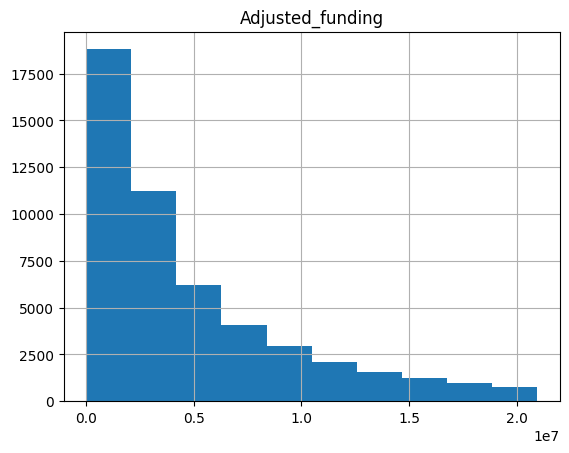

In [142]:
pd.DataFrame(y_train_no_outliers).hist()


In [120]:
# Fit the Gradient Boosting model to the outlier-removed training data
pipeline_with_gb.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the outlier-removed test set
y_pred_gb_no_outliers = pipeline_with_gb.predict(X_test_no_outliers)

# Evaluate the Gradient Boosting model on the outlier-removed dataset
mae_gb_no_outliers = mean_absolute_error(y_test_no_outliers, y_pred_gb_no_outliers)
mse_gb_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_gb_no_outliers)
rmse_gb_no_outliers = np.sqrt(mse_gb_no_outliers)
r2_gb_no_outliers = r2_score(y_test_no_outliers, y_pred_gb_no_outliers)

gb_metrics_no = [mae_gb_no_outliers, mse_gb_no_outliers, rmse_gb_no_outliers, r2_gb_no_outliers]

mae_gb_no_outliers, mse_gb_no_outliers, rmse_gb_no_outliers, r2_gb_no_outliers

(1138453.0687118643,
 3335621604788.3433,
 1826368.4197851054,
 0.8584464172903843)

In [121]:
metric_names = ['mae', 'mse', 'rmse', 'r2']
performance_df = pd.DataFrame({
    'Linear_Reg': lr_metrics,
    'Lin_reg_no': lr_metrics_no,
    'GBoost_no': gb_metrics_no
}, index=metric_names)

performance_df

,Linear_Reg,Lin_reg_no,GBoost_no
mae,4.561652e+06,2.406344e+06,1.138453e+06
mse,2.387923e+14,2.550811e+13,3.335622e+12
rmse,1.545291e+07,5.050556e+06,1.826368e+06
r2,9.393947e-01,-8.248624e-02,8.584464e-01


# RNN

In [137]:
# Separate features and target
X = df.drop('Adjusted_funding', axis=1)
y = df['Adjusted_funding']

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features and one-hot encode categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert to float32 for TensorFlow compatibility
X_train_preprocessed = np.array(X_train_preprocessed, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test_preprocessed = np.array(X_test_preprocessed, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Reshape the data for RNN input
X_train_reshaped = np.reshape(X_train_preprocessed, (X_train_preprocessed.shape[0], 1, X_train_preprocessed.shape[1]))
y_train_reshaped = np.reshape(y_train, (y_train.shape[0], 1))
X_test_reshaped = np.reshape(X_test_preprocessed, (X_test_preprocessed.shape[0], 1, X_test_preprocessed.shape[1]))
y_test_reshaped = np.reshape(y_test, (y_test.shape[0], 1))

X_train_reshaped.shape, y_train_reshaped.shape, X_test_reshaped.shape, y_test_reshaped.shape


((49737, 1, 17), (49737, 1), (12435, 1, 17), (12435, 1))

In [140]:
# Import necessary TensorFlow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Initialize the RNN model
model = Sequential()

# Add an RNN layer with 50 units
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add a Dense layer with 1 unit (for regression)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Fit the model
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test_reshaped)
loss


Epoch 1/50
1244/1244 [==============================] - 1s 763us/step - loss: 10491000.0000 - val_loss: 11374773.0000
Epoch 2/50
1244/1244 [==============================] - 1s 685us/step - loss: 10490290.0000 - val_loss: 11373755.0000
Epoch 3/50
1244/1244 [==============================] - 1s 686us/step - loss: 10489034.0000 - val_loss: 11372268.0000
Epoch 4/50
1244/1244 [==============================] - 1s 694us/step - loss: 10487325.0000 - val_loss: 11370363.0000
Epoch 5/50
1244/1244 [==============================] - 1s 693us/step - loss: 10485230.0000 - val_loss: 11368064.0000
Epoch 6/50
1244/1244 [==============================] - 1s 694us/step - loss: 10482737.0000 - val_loss: 11365366.0000
Epoch 7/50
1244/1244 [==============================] - 1s 672us/step - loss: 10479833.0000 - val_loss: 11362273.0000
Epoch 8/50
1244/1244 [==============================] - 1s 670us/step - loss: 10476548.0000 - val_loss: 11358794.0000
Epoch 9/50
1244/1244 [==============================] - 

10069685.0

<bound method Model.compute_metrics of <keras.src.engine.sequential.Sequential object at 0x2a1266950>>

## Once More

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew

# Load the dataset
df = pd.read_csv('../raw_data/all_expanded_ML.csv')

# Drop unnecessary columns
columns_to_drop = ['Código_UF', 'UF', 'Estado', 'Município', 'Região']
df_dropped = df.drop(columns=columns_to_drop)

# Feature engineer
df['Teacher_Student_Ratio'] = df['Docentes'] / df['Matrículas']
df['Educational_Infrastructure_Index'] = df['Estabelecimentos'] / df['Adjusted_population']
df['Students_Passing'] = (df['Aprovação'] / 100) * df['Matrículas']
df['Students_Failing'] = (df['Reprovação'] / 100) * df['Matrículas']
df['Students_DroppingOut'] = (df['Abandono'] / 100) * df['Matrículas']
df['Students_Passing_Per_Batch'] = df['Students_Passing']/df['Turmas']
df['Students_Failing_Per_Batch'] = df['Students_Failing']/df['Turmas']
df['Students_DroppingOut_Per_Batch'] = df['Students_DroppingOut']/df['Turmas']

# One-hot encode categorical columns
df_one_hot = pd.get_dummies(df_dropped, columns=['Localização'], drop_first=True)

# Identify highly skewed columns
high_skew_cols = ['Docentes', 'Turmas', 'Adjusted_funding', 'Matrículas', 
                  'Adjusted_population', 'Estabelecimentos', 'Magreza_total_%']

# Apply log transformations to highly skewed columns
df_transformed = df_one_hot.copy()
for col in high_skew_cols:
    df_transformed[col] = np.log1p(df_transformed[col])

# Filter out outliers in 'Adjusted_funding' using IQR method
Q1 = df_transformed['Adjusted_funding'].quantile(0.25)
Q3 = df_transformed['Adjusted_funding'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df_transformed[(df_transformed['Adjusted_funding'] >= lower_bound) & 
                             (df_transformed['Adjusted_funding'] <= upper_bound)]

# Columns to standardize and normalize
cols_to_standardize = ['Aprovação', 'Reprovação', 'Abandono', 'PIB', 'Poverty_%', 'Unemployed_%', 'Acesso_a_internet_%']
cols_to_normalize = high_skew_cols

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply standardization and normalization
df_scaled = df_filtered.copy()
df_scaled[cols_to_standardize] = scaler_standard.fit_transform(df_filtered[cols_to_standardize])
df_scaled[cols_to_normalize] = scaler_minmax.fit_transform(df_filtered[cols_to_normalize])


In [150]:
# Sort the data by the 'Ano' column
df_sorted = df_scaled.sort_values(by='Ano')

# Show the first few rows of the sorted data
df_sorted.head()

,Ano,Código_IBGE,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,Magreza_total_%,PIB,Poverty_%,Unemployed_%,Acesso_a_internet_%,Adjusted_population,Adjusted_funding,Localização_Urbana
0,2012,1100023,0.798157,-0.610346,-0.577419,0.572399,0.310828,0.150844,0.375963,0.240202,-0.694185,0.246027,-1.017784,-2.129804,0.469498,0.545160,False
4553,2012,3126604,0.290153,-0.952617,0.586640,0.512334,0.229128,0.150844,0.281972,0.344354,-0.396736,-0.330073,-0.868076,-0.470381,0.326779,0.351507,True
4552,2012,3126406,-0.102832,-0.432365,0.631412,0.447043,0.234139,0.150844,0.242963,0.413758,-0.396736,-0.330073,-0.868076,-0.470381,0.257548,0.336159,True
4551,2012,3126307,-0.217851,-0.090093,0.437402,0.473188,0.218093,0.150844,0.263865,0.415675,-0.396736,-0.330073,-0.868076,-0.470381,0.306572,0.266575,True
4550,2012,3126208,1.056952,-1.075835,-0.472952,0.541029,0.272370,0.150844,0.347807,0.268330,-0.396736,-0.330073,-0.868076,-0.470381,0.390673,0.392332,True


In [152]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_sorted.drop(['Adjusted_funding'], axis=1)
y = df_sorted['Adjusted_funding']

# Calculate the index to split the data into training and test sets
split_index = int(len(df_sorted) * 0.8)

# Time-based split
X_train, X_test = X.iloc[:split_index, :], X.iloc[split_index:, :]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Show the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49323, 16), (12331, 16), (49323,), (12331,))